In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [9]:
data = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
#For categorical variables
from collections import Counter
Counter(data.ocean_proximity)

Counter({'NEAR BAY': 2290,
         '<1H OCEAN': 9136,
         'INLAND': 6551,
         'NEAR OCEAN': 2658,
         'ISLAND': 5})

In [12]:
#Missing Values
#PairPlot
#Correlation
#Skewness
#Scaling
#Model Building (Test R2)

In [13]:
dummy = pd.get_dummies(data["ocean_proximity"], prefix='Ocean_').iloc[:,:-1]
data = pd.concat([data,dummy], axis=1)
data = data.drop("ocean_proximity", axis=1)
data.shape

(20640, 13)

In [15]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean__<1H OCEAN,Ocean__INLAND,Ocean__ISLAND,Ocean__NEAR BAY
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   Ocean__<1H OCEAN    20640 non-null  uint8  
 10  Ocean__INLAND       20640 non-null  uint8  
 11  Ocean__ISLAND       20640 non-null  uint8  
 12  Ocean__NEAR BAY     20640 non-null  uint8  
dtypes: float64(9), uint8(4)
memory usage: 1.5 MB


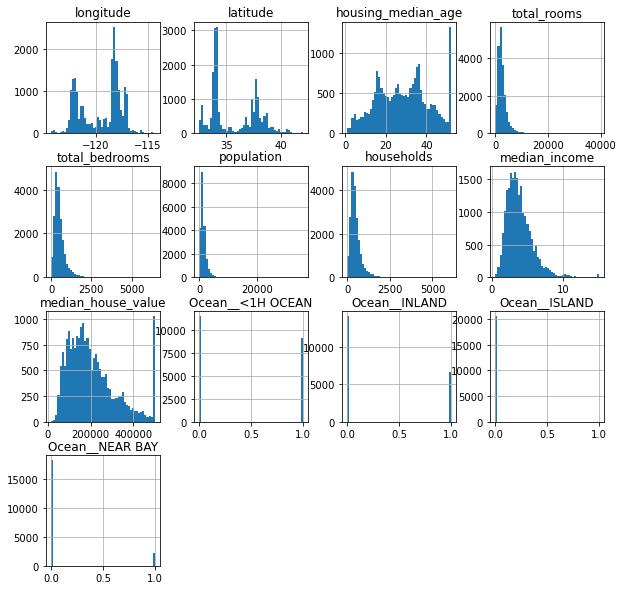

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
data.hist(figsize=(10,10), bins=50)
plt.show()

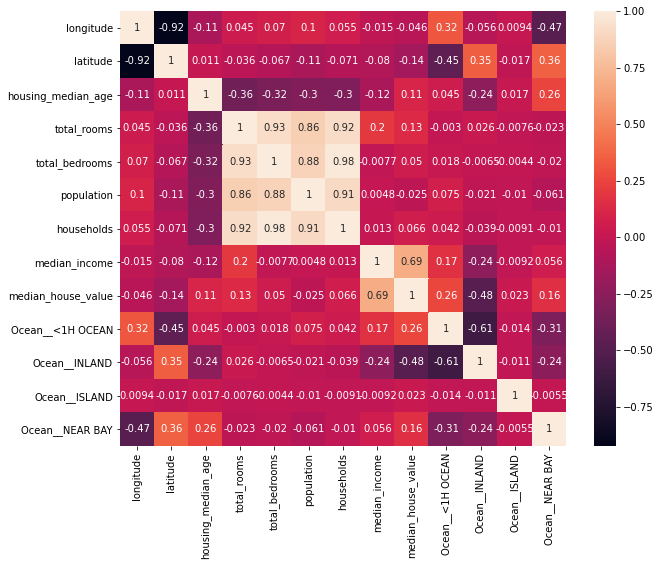

In [19]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(),annot=True)

In [20]:
data["rooms_per_households"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"] = data["population"]/data["households"]
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Ocean__<1H OCEAN,Ocean__INLAND,Ocean__ISLAND,Ocean__NEAR BAY,rooms_per_households,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,6.281853,0.172096,2.181467


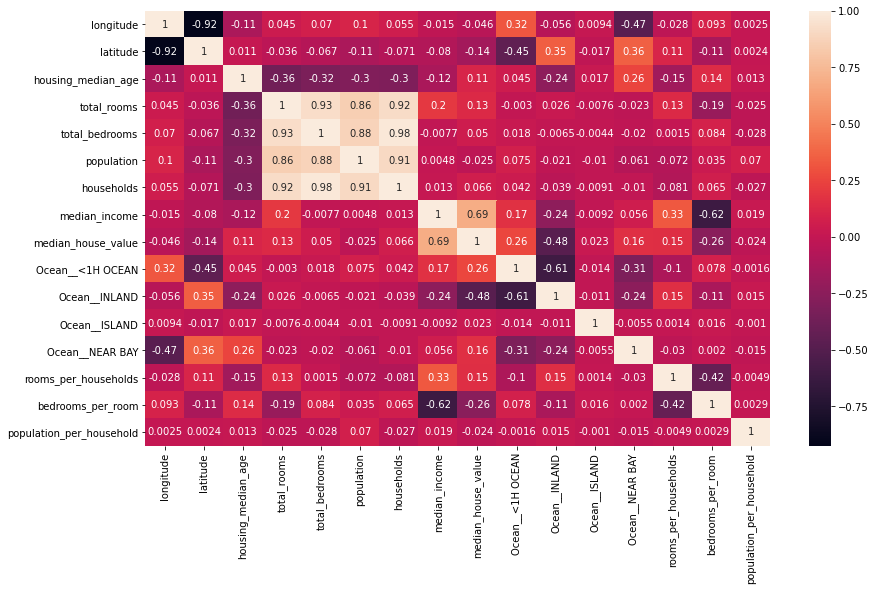

In [21]:
plt.figure(figsize = (14,8))
sns.heatmap(data.corr(),annot=True)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
X=data.drop('median_house_value',axis=1)
y=data['median_house_value']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
sc=StandardScaler()
pt=PowerTransformer()
it=IterativeImputer(estimator = LinearRegression())
Xtrain = it.fit_transform(Xtrain)
Xtest = it.transform(Xtest)
powerXtrain = pt.fit_transform(Xtrain)
powerXtest = pt.transform(Xtest)
scaledXtrain = sc.fit_transform(powerXtrain)
scaledXtest = sc.transform(powerXtest)
lr = LinearRegression()
lr.fit(scaledXtrain,ytrain)
print("Training R2")
print(lr.score(scaledXtrain,ytrain))
print("Testing R2")
print(lr.score(scaledXtest,ytest))

Training R2
0.6267093436887283
Testing R2
0.624789658234631


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
X=data.drop('median_house_value',axis=1)
y=data['median_house_value']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("it", IterativeImputer(estimator = LinearRegression())),
("pt", PowerTransformer()),
("sc",StandardScaler()),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

Training R2
0.6267093436887283
Testing R2
0.624789658234631


In [1]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
X=data.drop('median_house_value',axis=1)
y=data['median_house_value']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("it", IterativeImputer(estimator = LinearRegression())),
("pt", PowerTransformer()),
("sc",StandardScaler()),
("poly",PolynomialFeatures(degree=2)),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

NameError: name 'data' is not defined

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
X=data.drop('median_house_value',axis=1)
y=data['median_house_value']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("it", IterativeImputer(estimator = LinearRegression())), 
("pt", PowerTransformer()),
("sc",StandardScaler()),
("lr", GradientBoostingRegressor(n_estimators=1000)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

Training R2
0.897982671442231
Testing R2
0.8332965922531741


In [42]:
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import RFE
X=data.drop('median_house_value',axis=1)
y=data['median_house_value']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
pipe = Pipeline((
("it", IterativeImputer(estimator = LinearRegression())), 
("pt", PowerTransformer()),
("sc",StandardScaler()),
("rfe",RFE(estimator=XGBRegressor(), n_features_to_select=8, step=1)),
("lr", XGBRegressor(n_estimators=90)),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

Training R2
0.9127891499958874
Testing R2
0.8236093491772495


In [47]:
from sklearn.model_selection import cross_val_score
scoresxgb = cross_val_score(pipe,Xtrain,ytrain,cv=5,scoring='r2')
print(scoresxgb)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


[0.81881171 0.77199355 0.77826107 0.81463531 0.76836314]


In [48]:
print("Average R2")
print(np.mean(scoresxgb))
print("SD of R2")
print(np.std(scoresxgb))

Average R2
0.790412956633583


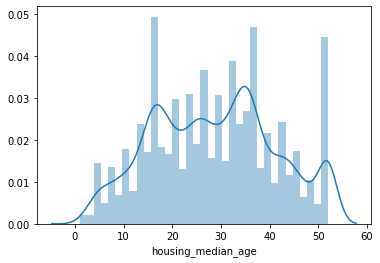

In [43]:
#Cross Validation
sns.distplot(Xtrain['housing_median_age'])

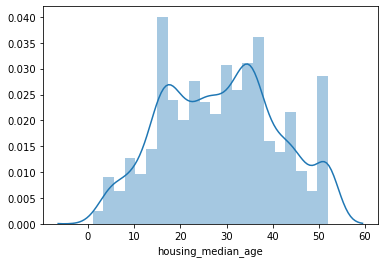

In [44]:
sns.distplot(Xtest['housing_median_age'])

In [45]:
import scipy.stats as stats
stats.ttest_ind(Xtrain['housing_median_age'],Xtest['housing_median_age'])

Ttest_indResult(statistic=-0.6542615806074333, pvalue=0.5129505839594237)